<a href="https://colab.research.google.com/github/cheronymo/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic prediction

Dans ce notebook on va chercher à comprendre comment la tragédie du titanic et comment se distribut les voyageurs entre les survivants et les morts. 
Le jeu de données viens de kaggle : https://www.kaggle.com/competitions/titanic/overview.

##Import packages

On importe les packages de bases sur python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

##Import Data & Exploration

On va importer tous les jeux de données et voir ce qu'on peut faire avec.

###Train

In [ ]:
train = pd.read_csv('train.csv', index_col = 0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####Survivor proportion

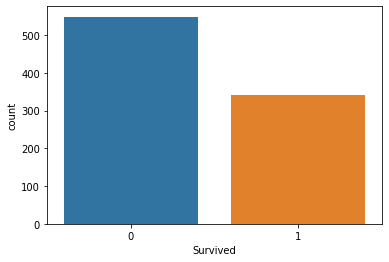

In [ ]:
sns.countplot(x=train["Survived"]);


C'est à peu près equilibré on devrait pouvoir prédir

####Exploration

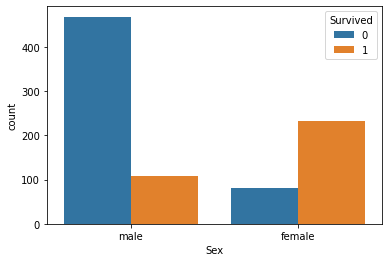

In [ ]:
sns.countplot(x=train["Sex"], hue=train["Survived"]);


Les hommes semble mourir plus que les femmes


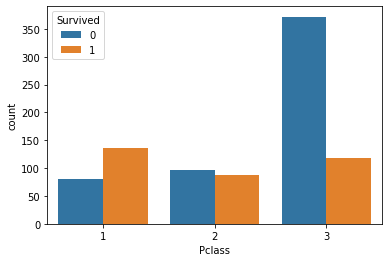

In [ ]:
sns.countplot(x=train["Pclass"], hue=train["Survived"]);


Les 3eme classes semble plus mourir

In [ ]:
print("L'age moyen des SURVIVANTS est de ", train[train["Survived"]==1]['Age'].mean(), "ans.")

L'age moyen des SURVIVANTS est de  28.343689655172415 ans.


In [ ]:
print("L'age moyen des MORTS est de ", train[train["Survived"]==0]['Age'].mean(), "ans.")


L'age moyen des MORTS est de  30.62617924528302 ans.


Les vieux sont plus mort

In [ ]:
print("Le prix moyen des SURVIVANTS est de ", train[train["Survived"]==1]['Fare'].mean(), "$.")

Le prix moyen des SURVIVANTS est de  48.39540760233918 $.


In [ ]:
print("Le prix moyen des MORTS est de ", train[train["Survived"]==0]['Fare'].mean(), "$.")

Le prix moyen des MORTS est de  22.117886885245902 $.


Les pauvres sont plus mort

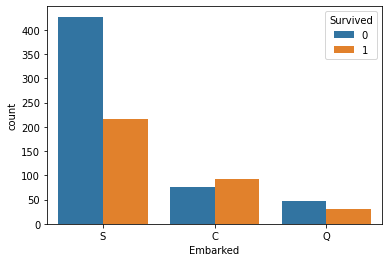

In [ ]:
sns.countplot(x=train["Embarked"], hue=train["Survived"]);


###Test

In [ ]:
test = pd.read_csv('test.csv', index_col = 0)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


####Test predict

In [ ]:
predict = pd.read_csv('gender_submission.csv', index_col = 0)
predict.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


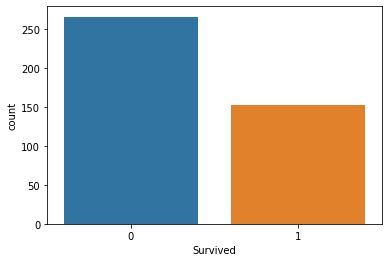

In [ ]:
sns.countplot(x=predict["Survived"]);


## Data transformation

###Train

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train = train.drop(["Name",'Ticket',"Cabin" ], axis = 1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [ ]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Il y a 177 NaN sur 891 lignes, on prend la decision de les retirer.

In [ ]:
train = train.dropna()
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
train_X = train.drop(["Survived"], axis = 1)


In [ ]:
train_X_dum = pd.get_dummies(train_X)
train_X_dum

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,3,39.0,0,5,29.1250,1,0,0,1,0
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1


In [ ]:
train_Y = train['Survived']
train_Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: int64

###Test

In [ ]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
test_tot =  pd.merge(test, predict, on="PassengerId")
test_tot.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Survived      0
dtype: int64

In [ ]:
test_tot = test_tot.drop(["Name",'Ticket',"Cabin" ], axis = 1)

In [ ]:
test_tot = test_tot.dropna()
test_tot.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [ ]:
test_X_clean = test_tot.drop(["Survived"], axis = 1)


In [ ]:
test_X_dum = pd.get_dummies(test_X_clean)
test_X_dum

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,1,0
893,3,47.0,1,0,7.0000,1,0,0,0,1
894,2,62.0,0,0,9.6875,0,1,0,1,0
895,3,27.0,0,0,8.6625,0,1,0,0,1
896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1301,3,3.0,1,1,13.7750,1,0,0,0,1
1303,1,37.0,1,0,90.0000,1,0,0,1,0
1304,3,28.0,0,0,7.7750,1,0,0,0,1


In [ ]:
test_Y = test_tot['Survived']
test_Y

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1301    1
1303    1
1304    1
1306    1
1307    0
Name: Survived, Length: 331, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_dum_scale = scaler.fit_transform(train_X_dum)
test_X_dum_scale = scaler.transform(test_X_dum)

##Model

####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X_dum_scale, train_Y)


In [ ]:
y_pred = clf.predict(test_X_dum_scale)

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))


Accuracy: 0.770392749244713


In [ ]:
importance = clf.feature_importances_
i = 0

while i < len(test_X_dum.columns):
  print("L'importance relative de ",test_X_dum.columns[i],'est de ', round(importance[i]*100, 2), '%')
  i += 1

L'importance relative de  Pclass est de  13.38 %
L'importance relative de  Age est de  26.0 %
L'importance relative de  SibSp est de  5.87 %
L'importance relative de  Parch est de  2.42 %
L'importance relative de  Fare est de  20.24 %
L'importance relative de  Sex_female est de  0.0 %
L'importance relative de  Sex_male est de  29.74 %
L'importance relative de  Embarked_C est de  1.4 %
L'importance relative de  Embarked_Q est de  0.12 %
L'importance relative de  Embarked_S est de  0.84 %


#####Vizualisation

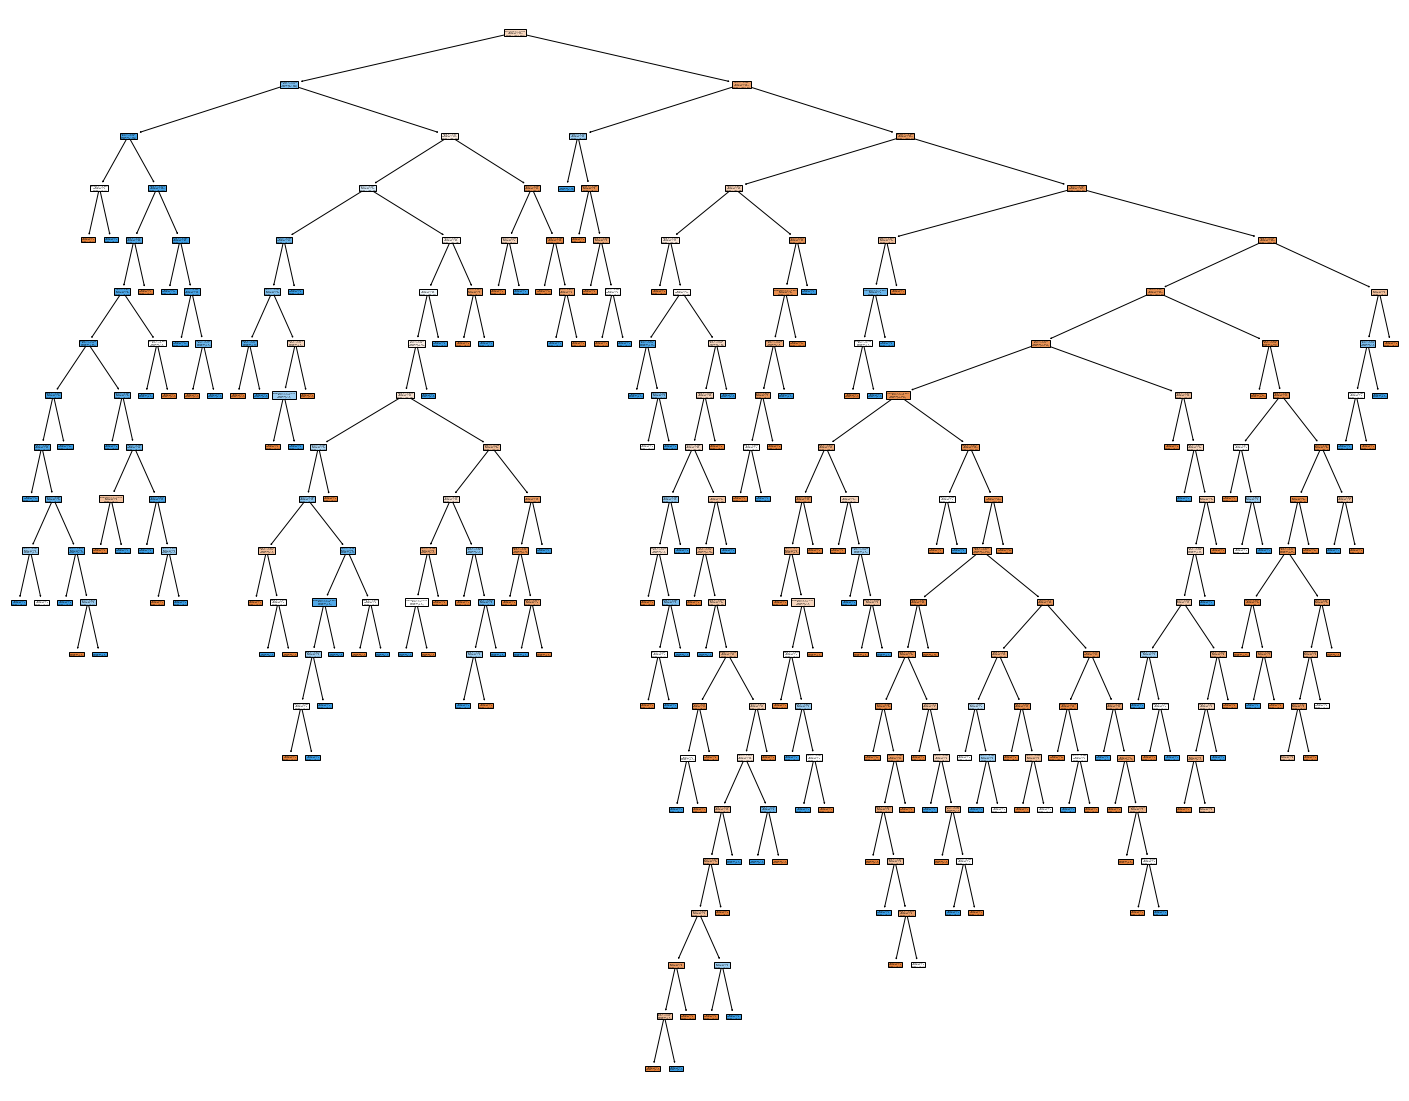

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = train_X_dum.columns,
                   filled=True)

####Gradient Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(train_X_dum_scale, train_Y)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_pred_ada = ada_clf.predict(test_X_dum_scale)

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred_ada))


Accuracy: 0.8942598187311178


In [ ]:
importance = ada_clf.feature_importances_
i = 0

while i < len(test_X_dum.columns):
  print("L'importance relative de ",test_X_dum.columns[i],'est de ', round(importance[i]*100, 2), '%')
  i += 1

L'importance relative de  Pclass est de  3.0 %
L'importance relative de  Age est de  33.0 %
L'importance relative de  SibSp est de  5.0 %
L'importance relative de  Parch est de  1.0 %
L'importance relative de  Fare est de  53.0 %
L'importance relative de  Sex_female est de  0.0 %
L'importance relative de  Sex_male est de  4.0 %
L'importance relative de  Embarked_C est de  1.0 %
L'importance relative de  Embarked_Q est de  0.0 %
L'importance relative de  Embarked_S est de  0.0 %


In [ ]:
from sklearn.model_selection import GridSearchCV

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

clf_grid = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf_grid.fit(train_X_dum, train_Y)



Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [ ]:
y_pred_ada_grid = clf_grid.predict(test_X_dum)
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred_ada_grid))


Accuracy: 0.8700906344410876


####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
rdf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
rdf.fit(train_X_dum_scale, train_Y)
y_pred_rdf = rdf.predict(test_X_dum_scale)

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred_ada))


Accuracy: 0.8942598187311178


In [ ]:
rdf.predict_proba(test_X_dum_scale)[:10]

array([[0.81619636, 0.18380364],
       [0.47693326, 0.52306674],
       [0.78451001, 0.21548999],
       [0.81727816, 0.18272184],
       [0.43329436, 0.56670564],
       [0.81389219, 0.18610781],
       [0.47487296, 0.52512704],
       [0.72122281, 0.27877719],
       [0.43660871, 0.56339129],
       [0.79217028, 0.20782972]])

In [ ]:
rdf.feature_importances_

array([0.14446725, 0.03434812, 0.00949961, 0.01672763, 0.10496907,
       0.30869195, 0.34939103, 0.02766314, 0.00089364, 0.00334857])

In [ ]:
importance = rdf.feature_importances_
i = 0

while i < len(test_X_dum.columns):
  print("L'importance relative de ",test_X_dum.columns[i],'est de ', round(importance[i]*100, 2), '%')
  i += 1

L'importance relative de  Pclass est de  14.45 %
L'importance relative de  Age est de  3.43 %
L'importance relative de  SibSp est de  0.95 %
L'importance relative de  Parch est de  1.67 %
L'importance relative de  Fare est de  10.5 %
L'importance relative de  Sex_female est de  30.87 %
L'importance relative de  Sex_male est de  34.94 %
L'importance relative de  Embarked_C est de  2.77 %
L'importance relative de  Embarked_Q est de  0.09 %
L'importance relative de  Embarked_S est de  0.33 %


####SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf_SVC = SVC(gamma='auto')
clf_SVC.fit(train_X_dum_scale, train_Y)
y_pred_SVC = clf_SVC.predict(test_X_dum_scale)

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred_SVC))


Accuracy: 0.9365558912386707


####Tensorflow - deep learning

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.003),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

n_epoch = 200
history = model.fit(train_X_dum_scale, train_Y, epochs=n_epoch)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


23/23 [==============================] - 2s 12ms/step - loss: 0.2680 - accuracy: 0.8848 - precision: 0.9221 - recall: 0.7812
Epoch 2/200
23/23 [==============================] - 0s 9ms/step - loss: 0.2318 - accuracy: 0.8933 - precision: 0.8985 - recall: 0.8299
Epoch 3/200
23/23 [==============================] - 0s 9ms/step - loss: 0.2354 - accuracy: 0.8947 - precision: 0.9209 - recall: 0.8090
Epoch 4/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2483 - accuracy: 0.8904 - precision: 0.9134 - recall: 0.8056
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 0.2361 - accuracy: 0.9059 - precision: 0.9234 - recall: 0.8368
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.2366 - accuracy: 0.8919 - precision: 0.8922 - recall: 0.8333
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.9003 - precision: 0.9157 - recall: 0.8299
Epoch 8/200
23/23 [==============================] - 0s 5ms

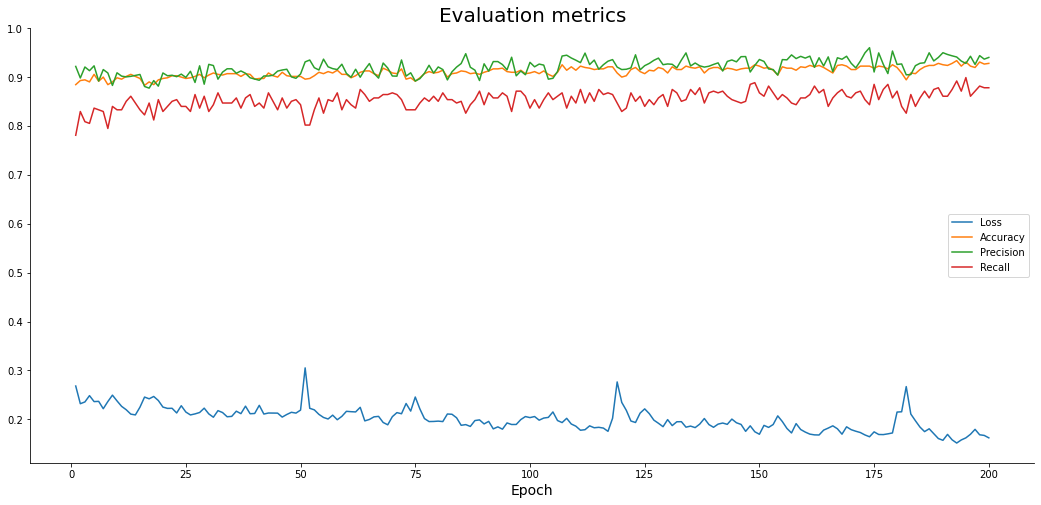

In [ ]:
plt.plot(
    np.arange(1, n_epoch+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, n_epoch+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, n_epoch+1), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, n_epoch+1), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(test_X_dum_scale)


11/11 [==============================] - 0s 2ms/step


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_Y, prediction_classes))

[[168  36]
 [ 31  96]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(test_Y, prediction_classes):.2f}')
print(f'Precision: {precision_score(test_Y, prediction_classes):.2f}')
print(f'Recall: {recall_score(test_Y, prediction_classes):.2f}')


Accuracy: 0.80
Precision: 0.73
Recall: 0.76
